# Esercizio 1.3
 Import


1.   defs.csv
2.   file stop words

#Stampa lunghezza definizioni e occorrenze iperonimi diretti e di primo livello





In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string #per punteggiatura
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
#per importare il dataset da google drive

from numpy import mean
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df = pd.read_csv (r'defs.csv')


def get_definition_for_concept(concept):
    concept_array= df[[concept]].to_numpy()
    concept_list=[]
    for arr in concept_array:
      concept_list.append(str(arr[0]))
    return concept_list

courage_definitions=get_definition_for_concept("Courage") #astratto generico
courage_definitions = [x for x in courage_definitions if str(x) != 'nan'] #rimuovo i nan dalla lista

paper_definitions=get_definition_for_concept("Paper")
paper_definitions= [x for x in paper_definitions if str(x) != 'nan']#rimuovo i nan dalla lista 

apprehension_definitions=get_definition_for_concept("Apprehension")
apprehension_definitions= [x for x in apprehension_definitions if str(x) != 'nan']#rimuovo i nan dalla lista 

sharpener_definitions=get_definition_for_concept("Sharpener")
sharpener_definitions= [x for x in sharpener_definitions if str(x) != 'nan']#rimuovo i nan dalla lista 

all_definitions ={} #dizionario con chiavi i nomi dei vari concetti

all_definitions["courage"]=courage_definitions
all_definitions["paper"]=paper_definitions
all_definitions["apprehension"]=apprehension_definitions
all_definitions["sharpener"]=sharpener_definitions



stop_words_list = []
lemmatizer = WordNetLemmatizer() 

"""
Lemmatization is the process of converting a word to its base form. 
The difference between stemming and lemmatization is, lemmatization considers 
the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, 
often leading to incorrect meanings and spelling errors.
"""

['Ability to face our own fears and do something that scars us or makes us unpleasent', 'the ability to face thing without fear ', 'Inner strength thaht allow you to face particular situations', 'Ability to control the fear', 'Ability to avoid fear and to take on risky actions', 'Being able to do something fearful', 'the ability to do something despite being frightened.', 'Feeling that allows us to face situations considered dangerous', 'the ability to do something that may be scary', 'is the ability to make drastic choices', 'ability to overcome fear', 'characteristic of a person who taking a risk', 'the quality of being able to do things which are generally dangerous or scaring', 'behavior typical of a hero', 'Ability to face difficult situations', 'ability to do something most people fear', 'Strength of mind that allows you to face difficult situations', "Ability to face one's fears", 'The ability to not be blocked by fear', 'emotion that allows someone to go beyond its expectations

'\nLemmatization is the process of converting a word to its base form. \nThe difference between stemming and lemmatization is, lemmatization considers \nthe context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, \noften leading to incorrect meanings and spelling errors.\n'

In [ ]:
# Ritorna il POS TAG di una parola
def get_wordnet_pos(word):
    
    treebank_tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
    if treebank_tag.startswith('J'):# JJ: adjective or numeral, ordinal JJR: adjective, comparative
        return wn.ADJ
    elif treebank_tag.startswith('V'): #VB: verb, base form VBN: verb, past participle VBP: verb, present tense, not 3rd person singular VBZ: verb, present tense, 3rd person singular 
        return wn.VERB
    elif treebank_tag.startswith('N'): #NN: noun, common, singular or mass NNP: noun, proper, singular NNPS: noun, proper, plural NNS: noun, common, plural
        return wn.NOUN
    elif treebank_tag.startswith('R'): # RB: adverb RBR: adverb, comparative RBR: adverb, comparative RP: particle
        return wn.ADV
    else:
        return ''

In [ ]:
# Ritorna una lista con le stop words
def get_stop_words():
    if len(stop_words_list) == 0:
       
        f = open("stop_words_FULL.txt", "r") 
        for x in f:
            stop_words_list.append(x)
    
    return stop_words_list + ['’']


# PREPROCESSING :Da una frase ritorna una lista con le singole parole (lemmi) rimuovendo le parole inutili (stop words..)
def get_list_of_gains_words(sentence):
    list_words_lemma = []
    # aus_list_words = sentence.split()
    aus_list_words = word_tokenize(sentence) #tokenizziamo la frase
    stop_words_list = get_stop_words() #prendo le stop words  dal file
    #per ogni parola nella lista dei token
    for w in aus_list_words:
        if w.lower() not in stop_words_list:#se la parola non è una stopword
            pos_tag = get_wordnet_pos(w) #prendo il post_tag di quella parola
            if pos_tag != '':
                #lemmatize può prendere come paramentro anche il pos tag per restringere il campo di ricerca del lemma
                list_words_lemma.append(lemmatizer.lemmatize(w.lower(), pos_tag)) 

    return list_words_lemma

# Ritorna la lista delle parole della signature di un synset lemmatizzata e senza stop words : gloss(definizione) + examples
def get_signature_of_synset(synset):
    # Gloss
    signature = get_list_of_gains_words(synset.definition()) #definizione senza stop words e con i lemmi
    # Examples
    for ex in synset.examples():
        list_ex = get_list_of_gains_words(ex) #esempio senza stop words e con i lemmi
        signature.extend(list_ex) # aggiunge l'esempio alla signature

    return signature


# Lemmatizzazione e rimozione stop word
def preprocessing():
    for i in range(len(courage_definitions)):
        courage_definitions[i] = get_list_of_gains_words(courage_definitions[i])
    for i in range(len(paper_definitions)):
        paper_definitions[i] = get_list_of_gains_words(paper_definitions[i])
    for i in range(len(sharpener_definitions)):
        sharpener_definitions[i] = get_list_of_gains_words(sharpener_definitions[i])
    for i in range(len(apprehension_definitions)):
        apprehension_definitions[i] = get_list_of_gains_words(apprehension_definitions[i])
    

# Restitusice l'insieme delle parole utilizzate nelle definizioni di
# un concetto (paper, sharpener, courage, apprehension)
def word_set(definizioni):
    words = set()

    for defin in definizioni:
        words.update(bag_of_words(defin))
        #for word in defin:
        #words.add(word)

    return words


# Data una lista di parole restituisce l'insieme delle parole (set) togliendo le parole ripetute
def bag_of_words(sentence):
    bag = set()
    for word in sentence:
        bag.add(word)
    return bag



In [ ]:
def get_definitions_length(definitions):
  definition_lenght=[]
  for defi in definitions:
    definition_lenght.append(len(defi))
  print(definition_lenght)
  return definition_lenght

#Grafico lunghezze delle definizioni

[9, 4, 7, 3, 6, 5, 5, 6, 5, 5, 3, 4, 9, 3, 4, 6, 6, 3, 5, 5, 5, 9, 3, 6]
[6, 4, 7, 6, 5, 7, 4, 6, 2, 6, 2, 3, 6, 3, 2, 4, 3, 6, 3, 3, 3, 4, 3, 6]
[4, 3, 4, 5, 5, 5, 4, 5, 3, 4, 3, 4, 4, 5, 4, 4, 5, 4, 5, 5, 5, 7, 4, 6]
[3, 3, 2, 2, 6, 8, 4, 4, 4, 6, 4, 3, 5, 10, 3, 3, 4, 3, 2, 2, 6, 3, 4, 5]


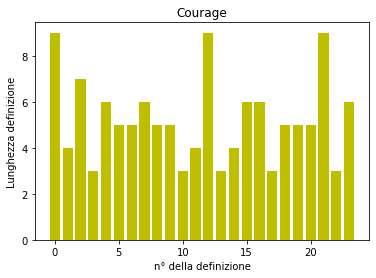

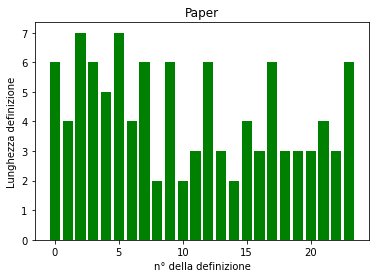

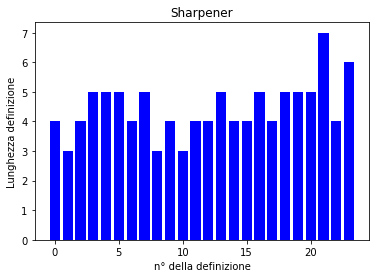

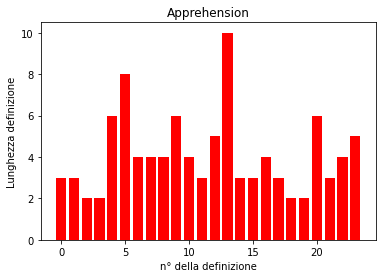

In [ ]:
from matplotlib import pyplot as plt 
preprocessing()

def plot_graph(x,y,title,color):
  plt.bar(x, y,color=color, align = 'center')
  plt.title(title) 
  plt.ylabel('Lunghezza definizione') 
  plt.xlabel('n° della definizione')
  plt.show() 


x = [x for x in range(len(courage_definitions))]
x2 = [x for x in range(len(paper_definitions))]
x3 = [x for x in range(len(sharpener_definitions))]
x4 = [x for x in range(len(apprehension_definitions))]


y = get_definitions_length(courage_definitions)
y2 = get_definitions_length(paper_definitions)
y3 = get_definitions_length(sharpener_definitions)
y4 = get_definitions_length(apprehension_definitions)


plot_graph(x,y,"Courage","y")
plot_graph(x2,y2,"Paper","g")
plot_graph(x3,y3,"Sharpener","b")
plot_graph(x4,y4,"Apprehension","r")





#Ricerca Iperonimi nelle definizioni



In [ ]:
def count_occurrences(definitions,lemmas_name, word_to_look):
  #if (word_to_look == 'sharpener'):
  #  print(definitions)
  hypernym_count=0
  hypernym_list=[]
  for definition in definitions:
    for word in definition: 
      for lemma in lemmas_name:
        if(word == lemma):
          hypernym_count+=1
          hypernym_list.append(word)
  return hypernym_count, hypernym_list

def count_hypernym(word_to_look):
  result_synset = wn.synsets(word_to_look) # andiamo a recuperare da wordnet tutti i synset della parola passata come parametro
  lemmas_name=[]
  #dal synset prendo il lemma e dal lemma prendo il nome
  hypernym_list = []
  for synset in result_synset: 
    for hypernym in synset.hypernyms():
      #print("Hypernym of concept " + word_to_look)
      #print(hypernym)
      hypernym_list.append(hypernym)
      for lemma in hypernym.lemmas():
        #print("Lemmas of hypernym " + str(hypernym))
        #print(lemma)
        lemmas_name.append(lemma.name())
      for second_level_hypernym in hypernym.hypernyms():
        """
        if (word_to_look == 'sharpener'):
          print(synset)
          print(synset.hypernyms())
          print("hypernym.hyopernims")
          print(hypernym.hypernyms())
          print("second level hypernym of " + str(hypernym))
          print(second_level_hypernym)
        """
        for lemma in second_level_hypernym.lemmas():
          lemmas_name.append(lemma.name())
 

  

  hypernym_count=0
  hypernym_list=[]
  # all_definitions è il set con tutte le definizioni che mi restituisce in questo caso le definizioni di "word_to_look"
  hypernym_count,hypernym_list = count_occurrences(all_definitions[word_to_look],lemmas_name,word_to_look)
  return hypernym_count,hypernym_list



count,h_list=count_hypernym("courage")
print("Courage: count:"+ str(count)+ " "+ str(h_list) )
count,h_list=count_hypernym("paper")
print("Paper: count:"+ str(count)+ " "+ str(h_list) )
count,h_list=count_hypernym("apprehension")
print("Apprehension: count:"+ str(count)+ " "+ str(h_list) )
count,h_list=count_hypernym("sharpener")
print("Sharpener: count:"+ str(count)+ " "+ str(h_list) )






Lemma('spirit.n.03.spirit')
Courage: count:0 []
Lemma('material.n.01.material')
Lemma('material.n.01.stuff')
Lemma('essay.n.01.essay')
Lemma('press.n.02.press')
Lemma('press.n.02.public_press')
Lemma('medium.n.01.medium')
Lemma('article.n.01.article')
Lemma('publisher.n.01.publisher')
Lemma('publisher.n.01.publishing_house')
Lemma('publisher.n.01.publishing_firm')
Lemma('publisher.n.01.publishing_company')
Lemma('product.n.02.product')
Lemma('product.n.02.production')
Lemma('cover.v.01.cover')
Lemma('cover.v.01.cover')
Paper: count:0 []
Lemma('fear.n.01.fear')
Lemma('fear.n.01.fearfulness')
Lemma('fear.n.01.fright')
Lemma('knowing.n.01.knowing')
Lemma('expectation.n.01.expectation')
Lemma('expectation.n.01.outlook')
Lemma('expectation.n.01.prospect')
Lemma('capture.n.01.capture')
Lemma('capture.n.01.gaining_control')
Lemma('capture.n.01.seizure')
Apprehension: count:0 []
Lemma('implement.n.01.implement')
Sharpener: count:0 []


#Risultati:
Aggiungendo la parola instrumentation (iperonimo di primo livello di sharpener)  a due definizioni di sharpener per essere sicuri che il codice funzioni otteniamo

```
Courage: count:0 []
Paper: count:21 ['material', 'material', 'product', 'material', 'material', 'material', 'product', 'material', 'material', 'material', 'material', 'medium', 'material', 'material', 'material', 'material', 'material', 'product', 'material', 'material', 'material']
Apprehension: count:9 ['expectation', 'fear', 'emotion', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear']
Sharpener: count:2 ['instrumentation', 'instrumentation']
```

